In [1]:
mapping={
1:"क", 2:"ख", 3:"घ", 
4:"च",  5:"ज", 6:"झ", 23:"ञ",
7:"ट", 8:"ठ", 9:"ड", 24:"ढ",
10:"त",  11:"द",  12:"न",
13:"प",  14:"ब",  15:"म",
16:"य", 17:"र", 18:"ल", 19:"व",  25:"ष",
20:"स", 21:"ह", 22:"त्र", 26:"ज्ञ",
}

# ****Importing Necessary Libraries****

In [2]:
import numpy as np
import pandas as pd
import os
import h5py
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import RMSprop

# # ****This Function basically removes the shirorekha from the letter and changes the dimension of the image and gets the image padded****

In [3]:
def preprotrain(img):
    a=(img.shape[0]*3)//10
    for i in range(a):
        img[i]=np.zeros(img.shape[1],dtype=int)    
    img=img[((img.shape[0]*2)//10):,:]
    image=cv2.copyMakeBorder(img,3,  3,  3, 3, cv2.BORDER_CONSTANT, None,0)
    image = cv2.resize(image, (36,36),interpolation = cv2.INTER_NEAREST)
    return image

In [4]:
im=preprotrain(cv2.imread('../input/mosaic-data/Train/1/10962.png',0))

# ****Loading the Training Set****

In [5]:
train_images=[]
train_labels=[]
train_dir='../input/mosaic-data/Train'
for i in range(0,26):
    dir=train_dir+'/'+str(i+1)
    print(dir)
    for img in os.listdir(dir):
        img=dir+'/'+img
        image=cv2.imread(img,0)
        image=preprotrain(image)
        train_images.append(image)
        a=np.zeros(26,dtype=int)
        a[i]=1
        train_labels.append(a)
        

../input/mosaic-data/Train/1
../input/mosaic-data/Train/2
../input/mosaic-data/Train/3
../input/mosaic-data/Train/4
../input/mosaic-data/Train/5
../input/mosaic-data/Train/6
../input/mosaic-data/Train/7
../input/mosaic-data/Train/8
../input/mosaic-data/Train/9
../input/mosaic-data/Train/10
../input/mosaic-data/Train/11
../input/mosaic-data/Train/12
../input/mosaic-data/Train/13
../input/mosaic-data/Train/14
../input/mosaic-data/Train/15
../input/mosaic-data/Train/16
../input/mosaic-data/Train/17
../input/mosaic-data/Train/18
../input/mosaic-data/Train/19
../input/mosaic-data/Train/20
../input/mosaic-data/Train/21
../input/mosaic-data/Train/22
../input/mosaic-data/Train/23
../input/mosaic-data/Train/24
../input/mosaic-data/Train/25
../input/mosaic-data/Train/26


In [6]:
train_labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [7]:
train_images[0].shape

(36, 36)

# ****Including the test set in training for better performance****

In [8]:
val_dir='../input/mosaic-data/Test'
for i in range(0,26):
    dir=val_dir+'/'+str(i+1)
    print(dir)
    for img in os.listdir(dir):
        img=dir+'/'+img
        image=cv2.imread(img,0)
        image=preprotrain(image)
        train_images.append(image)
        a=np.zeros(26,dtype=int)
        a[i]=1
        train_labels.append(a)

../input/mosaic-data/Test/1
../input/mosaic-data/Test/2
../input/mosaic-data/Test/3
../input/mosaic-data/Test/4
../input/mosaic-data/Test/5
../input/mosaic-data/Test/6
../input/mosaic-data/Test/7
../input/mosaic-data/Test/8
../input/mosaic-data/Test/9
../input/mosaic-data/Test/10
../input/mosaic-data/Test/11
../input/mosaic-data/Test/12
../input/mosaic-data/Test/13
../input/mosaic-data/Test/14
../input/mosaic-data/Test/15
../input/mosaic-data/Test/16
../input/mosaic-data/Test/17
../input/mosaic-data/Test/18
../input/mosaic-data/Test/19
../input/mosaic-data/Test/20
../input/mosaic-data/Test/21
../input/mosaic-data/Test/22
../input/mosaic-data/Test/23
../input/mosaic-data/Test/24
../input/mosaic-data/Test/25
../input/mosaic-data/Test/26


## ****Shuffling the Training images with their respective labels****

In [9]:
import random
zipped_list=list(zip(train_images,train_labels))
for i in range(100):
    random.shuffle(zipped_list)
train_images,train_labels=zip(*zipped_list)
train_images=list(train_images)
train_labels=list(train_labels)
train_images=np.array(train_images)
train_labels=np.array(train_labels)

## ****Reshaping the image from (36,36,) to (36,36,1)****

In [10]:
train_images=np.reshape(train_images,(-1,36,36,1))

## ****Showing 25 random images from training Data****

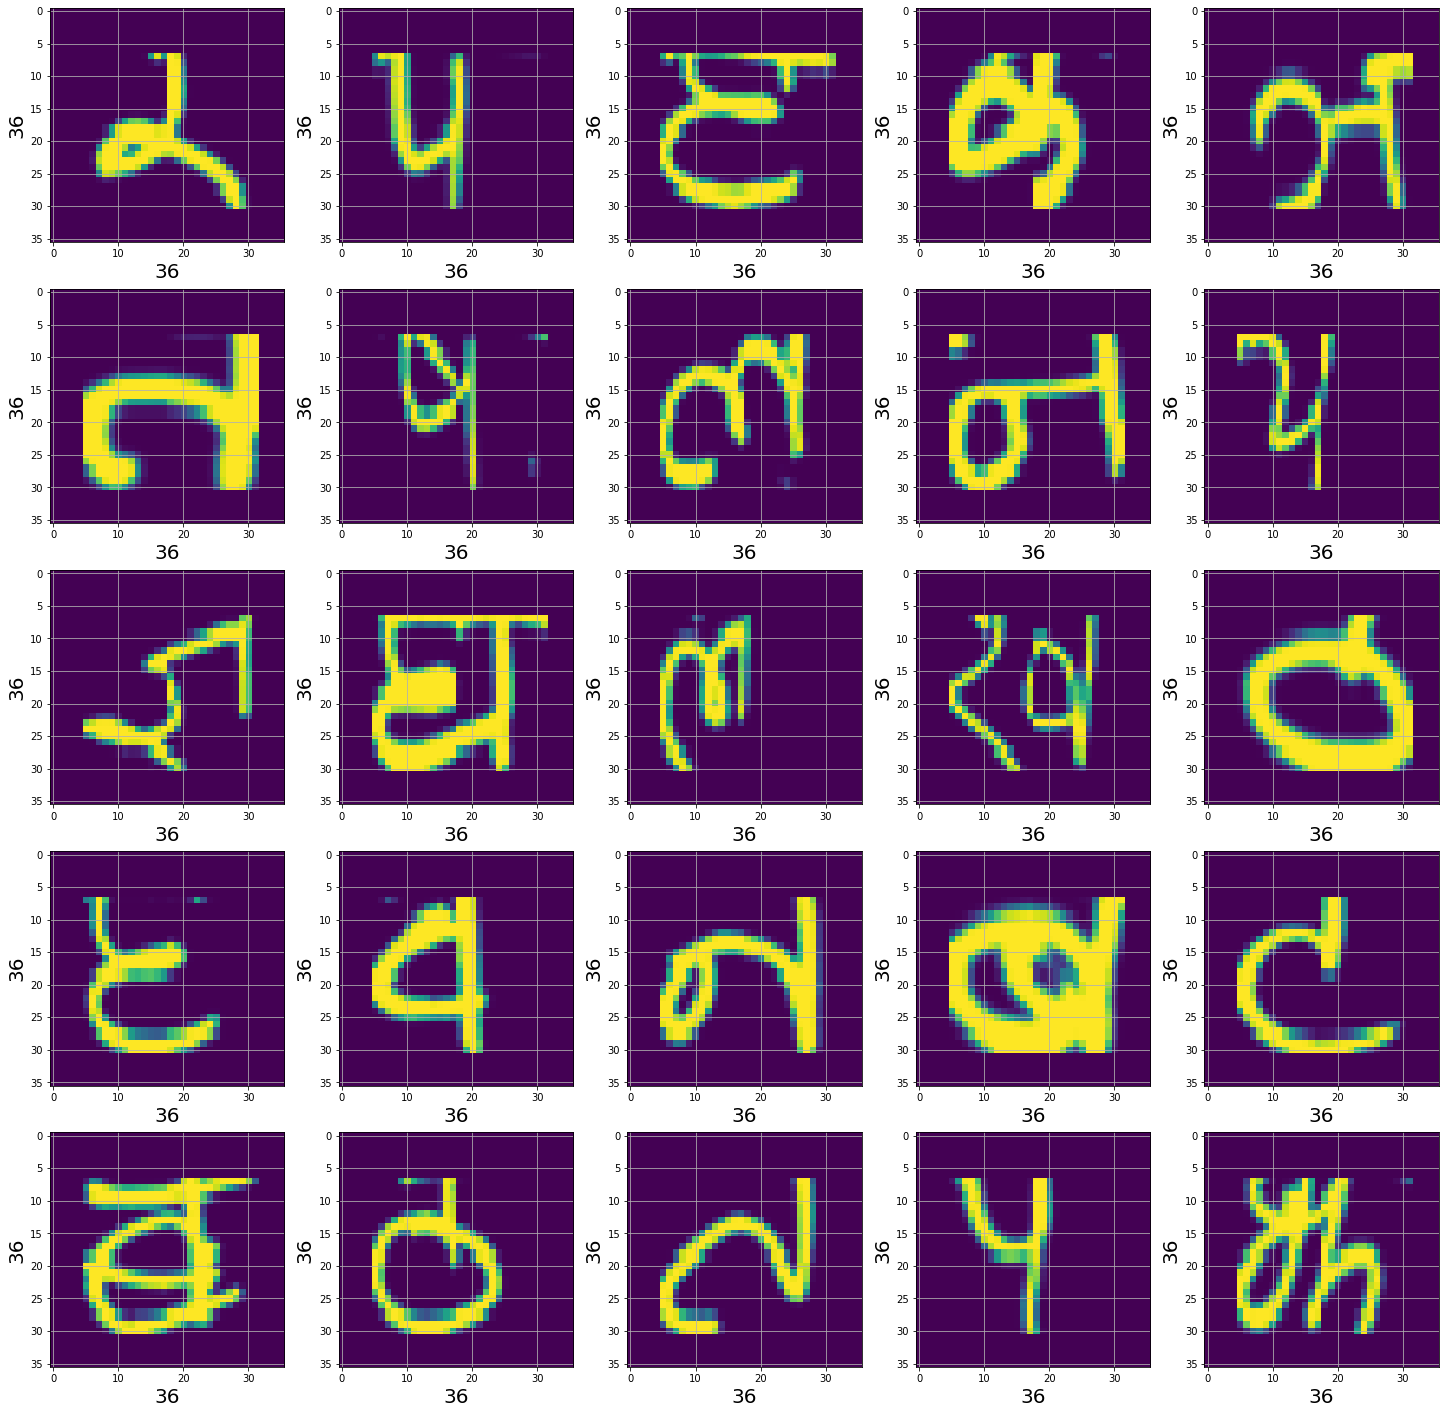

In [11]:
plt.figure(figsize=(25,25))
for i in range(1,26):
    plt.subplot(5,5,i)
    random_image=random.choice(train_images)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    

# ****Defining Model Architecture****

In [12]:
model = Sequential()

model.add(Conv2D(filters = 64,
kernel_size = (5,5),
strides = 1,
activation = "relu",
input_shape = (36,36,1)))

model.add(Conv2D(filters = 64,
kernel_size = (5,5),
strides = 1,
activation = "relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(26, activation = "softmax"))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

## ****Compiling the model****

In [14]:
optimizer =  RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
train_images.shape

(52000, 36, 36, 1)

In [16]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accurac
batch_size = 200

In [17]:
X_train=train_images/255.0
Y_train=train_labels

# ****Training the Model****

In [18]:
history = model.fit( X_train,Y_train, batch_size=batch_size,
                              epochs = 12,
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                               )

Epoch 1/12
260/260 [==============================] - 7s 16ms/step - loss: 1.4180 - accuracy: 0.5905
Epoch 2/12
260/260 [==============================] - 4s 15ms/step - loss: 0.2095 - accuracy: 0.9352
Epoch 3/12
260/260 [==============================] - 4s 16ms/step - loss: 0.1220 - accuracy: 0.9634
Epoch 4/12
260/260 [==============================] - 4s 16ms/step - loss: 0.0851 - accuracy: 0.9733
Epoch 5/12
260/260 [==============================] - 4s 15ms/step - loss: 0.0676 - accuracy: 0.9780
Epoch 6/12
260/260 [==============================] - 4s 16ms/step - loss: 0.0575 - accuracy: 0.9818
Epoch 7/12
260/260 [==============================] - 4s 15ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 8/12
260/260 [==============================] - 4s 15ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 9/12
260/260 [==============================] - 4s 16ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 10/12
260/260 [==============================] - 4s 15ms/step - loss: 0.0344 - accura

# ****Plot of Accuracy vs. No. of Epochs****

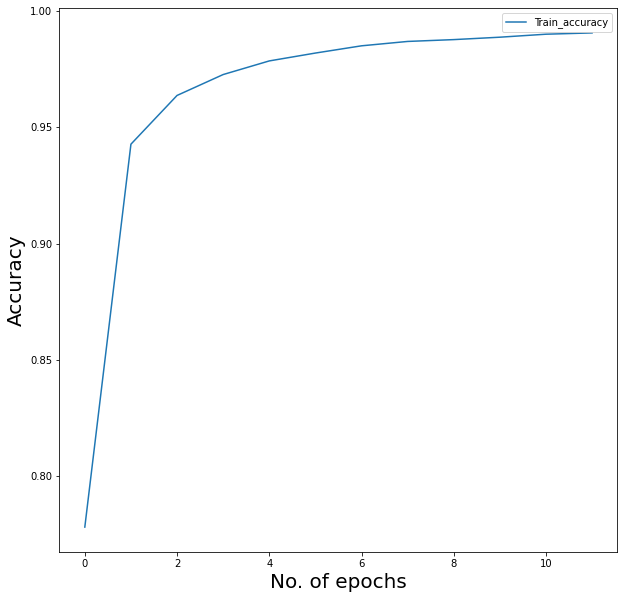

In [19]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.xlabel('No. of epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(['Train_accuracy'])
plt.show()

# ****Saving the model****

In [20]:
model.save("iiswe.h5")